<a href="https://colab.research.google.com/github/rihabidm/Classification/blob/main/Classification%20final%20version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

## Générer des données simulées pour la classification

In [ ]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [ ]:
X, y

(array([[-0.87292898,  0.013042  ],
        [ 1.31293463,  2.77053357],
        [ 2.34042818,  2.42099601],
        [ 2.29454774, -0.40438019],
        [ 0.94410516,  0.4772409 ],
        [-0.11959689,  0.50891314],
        [ 0.1510847 ,  0.81007677],
        [-0.00745441, -0.45284256],
        [-1.25396925,  0.06769236],
        [-0.24392415,  1.19979806],
        [-1.9208928 ,  2.9189499 ],
        [ 0.48806269,  3.50578584],
        [ 2.25751204,  1.81515089],
        [-3.12190908,  0.62220145],
        [ 1.87768113,  0.51095984],
        [ 0.46785542,  0.7871928 ],
        [ 0.48404809,  0.04843842],
        [-0.54235518,  3.49536942],
        [ 1.04235818,  1.10204918],
        [ 1.63367133,  0.59219328],
        [ 1.85756778,  1.7382647 ],
        [-2.41167954, -0.80620914],
        [ 0.87481918,  0.48815664],
        [ 0.09529002,  0.57526555],
        [-1.64994223, -0.06695917],
        [-0.65245349, -0.19158949],
        [ 2.10252081,  2.34684404],
        [ 2.9574463 ,  2.014

## Diviser les données en deux classes

In [ ]:
class_1 = X[y == 0]
class_2 = X[y == 1]

## Tracer le nuage de points

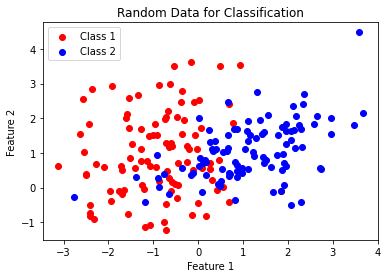

In [ ]:
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Data for Classification')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN classifier

In [ ]:
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Visualisation de la barrière de décision

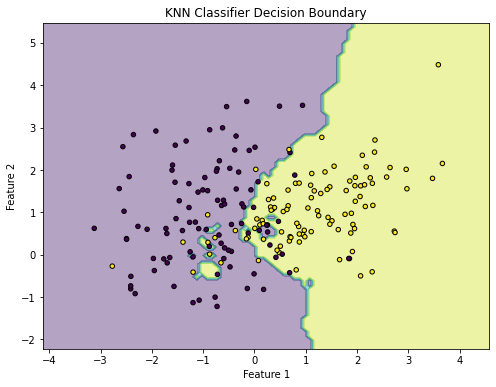

In [ ]:
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier Decision Boundary')
plt.show()

## Evaluation du classifier

In [ ]:
accuracy = knn_classifier.score(X_test, y_test)
print(f"Accuracy of KNN Classifier: {accuracy:.2f}")

Accuracy of KNN Classifier: 0.88


# Implementation de KNN from scratch

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                distance = np.sqrt(np.sum((x - x_train) ** 2))
                distances.append((distance, self.y_train[i]))
            distances.sort(key=lambda x: x[0])
            k_nearest_neighbors = distances[:self.k]
            majority_vote = max(set([neighbor[1] for neighbor in k_nearest_neighbors]), key=[neighbor[1] for neighbor in k_nearest_neighbors].count)
            predictions.append(majority_vote)
        return predictions

## Evaluation du classifier

In [ ]:
knn = KNN(k=5)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of KNN Classifier: {accuracy:.2f}")

Accuracy of KNN Classifier: 0.88


# Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## Créer et entraîner l'arbre de décision

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Faire des prédictions sur l'ensemble de test

In [ ]:
predictions = decision_tree.predict(X_test)

## Calculer l'exactitude

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

Accuracy of Decision Tree Classifier: 0.80


## Tracer l'arbre de décision

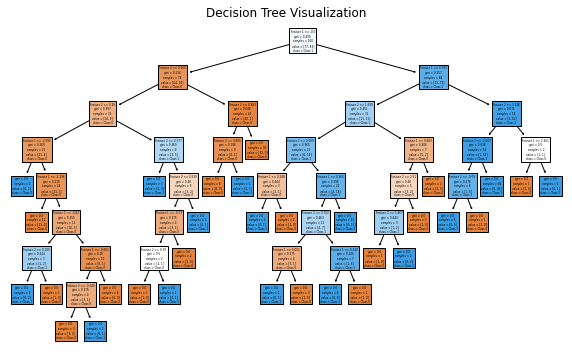

In [ ]:
plt.figure(figsize=(10, 6))
tree.plot_tree(decision_tree, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()

# Arbre de décision from scratch

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            leaf_value = self._most_common_label(y)
            return {'leaf': True, 'value': leaf_value}

        # Find the best split
        best_gain = -1
        best_feature_idx = None
        best_threshold = None
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self._information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold

        if best_gain == 0:
            leaf_value = self._most_common_label(y)
            return {'leaf': True, 'value': leaf_value}

        # Split the data
        left_idxs = X[:, best_feature_idx] < best_threshold
        right_idxs = ~left_idxs
        left_subtree = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right_subtree = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)

        return {'leaf': False,
                'feature_idx': best_feature_idx,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree}

    def _information_gain(self, X, y, feature_idx, threshold):
        left_idxs = X[:, feature_idx] < threshold
        right_idxs = ~left_idxs
        n_samples = len(y)
        left_weight = len(y[left_idxs]) / n_samples
        right_weight = len(y[right_idxs]) / n_samples
        gain = self._gini(y) - (left_weight * self._gini(y[left_idxs]) + right_weight * self._gini(y[right_idxs]))
        return gain

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        gini = 1 - np.sum(probs ** 2)
        return gini

    def _most_common_label(self, y):
        labels, counts = np.unique(y, return_counts=True)
        return labels[np.argmax(counts)]

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, tree):
        if tree['leaf']:
            return tree['value']
        if x[tree['feature_idx']] < tree['threshold']:
            return self._predict_tree(x, tree['left'])
        else:
            return self._predict_tree(x, tree['right'])


## Evaluaer l'exactitude de l'arbre

In [ ]:
dt = DecisionTree(max_depth=3)

dt.fit(X_train, y_train)

# Make predictions
predictions = dt.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

Accuracy of Decision Tree Classifier: 0.82


# SVM

## Instantiate and Train the SVM classifier

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## Make predictions and testing the accuracy

In [ ]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier: {accuracy:.2f}")

Accuracy of SVM Classifier: 0.85


# SVM from scratch

In [ ]:
class SVM:
    def __init__(self, C=1.0, max_iter=100, kernel='linear', gamma=None, degree=3):
        self.C = C
        self.max_iter = max_iter
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_samples, self.n_features = X.shape

        # Initialize alpha and bias
        self.alpha = np.zeros(self.n_samples)
        self.b = 0

        # Compute kernel matrix
        if self.kernel == 'linear':
            self.K = np.dot(X, X.T)
        elif self.kernel == 'rbf':
            if self.gamma is None:
                self.gamma = 1 / self.n_features
            self.K = self._rbf_kernel(X)
        elif self.kernel == 'poly':
            self.K = self._poly_kernel(X)
        else:
            raise ValueError("Invalid kernel type")

        # Train SVM using SMO algorithm
        for _ in range(self.max_iter):
            alpha_changed = 0
            for i in range(self.n_samples):
                Ei = self._predict(self.X[i]) - self.y[i]
                if ((self.y[i] * Ei < -1e-3 and self.alpha[i] < self.C) or
                    (self.y[i] * Ei > 1e-3 and self.alpha[i] > 0)):
                    j = self._select_random_index(i)
                    Ej = self._predict(self.X[j]) - self.y[j]

                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]

                    if self.y[i] != self.y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])

                    if L == H:
                        continue

                    eta = 2 * self.K[i, j] - self.K[i, i] - self.K[j, j]
                    if eta >= 0:
                        continue

                    self.alpha[j] -= self.y[j] * (Ei - Ej) / eta
                    self.alpha[j] = max(L, min(H, self.alpha[j]))

                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    self.alpha[i] += self.y[i] * self.y[j] * (alpha_j_old - self.alpha[j])

                    b1 = self.b - Ei - self.y[i] * (self.alpha[i] - alpha_i_old) * self.K[i, i] - \
                         self.y[j] * (self.alpha[j] - alpha_j_old) * self.K[i, j]
                    b2 = self.b - Ej - self.y[i] * (self.alpha[i] - alpha_i_old) * self.K[i, j] - \
                         self.y[j] * (self.alpha[j] - alpha_j_old) * self.K[j, j]

                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

                    alpha_changed += 1

            if alpha_changed == 0:
                break

    def _predict(self, x):
        if self.kernel == 'linear':
            return np.dot((self.alpha * self.y), self.K.dot(x)) + self.b
        elif self.kernel == 'rbf' or self.kernel == 'poly':
            K_x = self._compute_kernel(x, self.X)
            return np.sum(self.alpha * self.y * K_x) + self.b
        else:
            raise ValueError("Invalid kernel type")

    def predict(self, X):
        return np.sign([self._predict(x) for x in X])

    def _rbf_kernel(self, X):
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = np.exp(-self.gamma * np.linalg.norm(X[i] - X[j])**2)
        return K

    def _poly_kernel(self, X):
        return (np.dot(X, X.T) + 1) ** self.degree

    def _select_random_index(self, i):
        j = i
        while j == i:
            j = np.random.randint(self.n_samples)
        return j